# Проект "Сравнение выручки от тарифов оператора мобильной связи"

Оператор сотовой связи «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета коммерческий департамент оператора хочет понять, какой тариф приносит больше денег.
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Что известно о тарифах?

**Тариф "Смарт"**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

**Тариф "Ультра"**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

**Цель проекта** проекта сформулируем так: определить среди тарифов "Смарт" и "Ультра" компании "Мегалайн" приносящий наибольшую выручку.

Определим план работ:
1. Провести предварительный анализ данных.
2. Провести предобработку данных:
    - обнаружить осутствующие значения;
    - предположить возможные причины пропуска данных;
    - заполнить пропуски там, где это необходимо;
    - вычислить ряд параметров, описывающих поведение абонентов мобильной связи.
3. Провести анализ данных, в том числе графическими методами.
4. Проверить статистические гипотезы, связанные с целью проекта:
    - проверить гипотезу о наличии разницы в средней выручке от тарифов "Смарт" и "Ультра";
    - проверить гипотезу о наличии разницы в средней выручке от абонентов из Москвы с одной стороны, и абонентов из других регионов - с другой.
5. Сформулировать выводы относительно исследовательских вопросов.

Сразу договоримся: в этом проекте термины *пользователь* и *абонент* будут использоваться как синонимы.

Предварительное описание данных:

Таблица `'users'` (информация о пользователях):
- `'user_id'` — уникальный идентификатор пользователя
- `'age'` — возраст пользователя (годы)
- `'first_name'` — имя пользователя
- `'last_name'` — фамилия пользователя
- `'churn_date'` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `'city'` — город проживания пользователя
- `'reg_date'` — дата подключения тарифа (день, месяц, год)
- `'tariff'` — название тарифного плана

Таблица `'calls'` (информация о звонках):
- `'id'` — уникальный номер звонка
- `'call_date'` — дата звонка
- `'duration'` — длительность звонка в минутах
- `'user_id'` — идентификатор пользователя, сделавшего звонок

Таблица `'messages'` (информация о сообщениях):
- `'id'` — уникальный номер сообщения
- `'message_date'` — дата сообщения
- `'user_id'` — идентификатор пользователя, отправившего сообщение

Таблица `'internet'` (информация об интернет-сессиях):
- `'id'` — уникальный номер сессии
- `'mb_used'` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `'session_date'` — дата интернет-сессии
- `'user_id'` — идентификатор пользователя

Таблица `'tariffs'` (информация о тарифах):
- `'tariff_name'` — название тарифа
- `'rub_monthly_fee'` — ежемесячная абонентская плата в рублях
- `'minutes_included'` — количество минут разговора в месяц, включённых в абонентскую плату
- `'mb_per_month_included'` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `'rub_per_minute'` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `'rub_per_message'` — стоимость отправки сообщения сверх тарифного пакета
- `'rub_per_gb'` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Данные: первый взгляд

### Загрузка данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Для упрощения сохраним все пути для загрузки и сохранения файлов, которыми м ыпользуемся в зависимости от устройства для выполнения проекта:

In [2]:
path1 = '/datasets/'
path2 = '/Users/idrv/Yandex.Disk.localized/2022-Ya.Practicum/datasets/'
path3 = '/content/drive/MyDrive/Colab Notebooks/datasets/'

Загрузим датасеты:

In [3]:
try:
    users = pd.read_csv(path1 + 'users.csv')
    calls = pd.read_csv(path1 + 'calls.csv')
    internet = pd.read_csv(path1 + 'internet.csv')
    messages = pd.read_csv(path1 + 'messages.csv')
    tariffs = pd.read_csv(path1 + 'tariffs.csv')
except FileNotFoundError:
    try:
        users = pd.read_csv(path2 + 'users.csv')
        calls = pd.read_csv(path2 + 'calls.csv')
        internet = pd.read_csv(path2 + 'internet.csv')
        messages = pd.read_csv(path2 + 'messages.csv')
        tariffs = pd.read_csv(path2 + 'tariffs.csv')
    except FileNotFoundError:
        try:
            from google.colab import drive # optional, so imported here
            drive.mount('/content/drive')
            users = pd.read_csv(path3 + 'users.csv')
            calls = pd.read_csv(path3 + 'calls.csv')
            internet = pd.read_csv(path3 + 'internet.csv')
            messages = pd.read_csv(path3 + 'messages.csv')
            tariffs = pd.read_csv(path3 + 'tariffs.csv')
        except FileNotFoundError:
            print('File not found. Please, check the path!')

### Структура данных

Изучим структуру каждого датафрейма:

In [4]:
dataframes = (users, calls, messages, internet, tariffs)

for frame in dataframes:
    frame.info()
    display(frame.head())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Предварительный вывод о данных

Работать доведется с пятью датафреймами объемом от двух записей (датафрейм `'tariffs'`) до 202 тысяч записей (датафрейм `'calls'`).

Имена всех столбцов во всех датасетах соответствуют PEP8, за одним исключением: в датасете `'internet'` присутствует столбец `'Unnamed: 0'`, для которого в описании данных отсутствует пояснение. Все столбцы не содержат пропусков, кроме столбца 'churn_date' — даты прекращения пользования тарифом. Если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

Для некоторых столбцов может быть уместно изменение типа данных.

In [5]:
del path1, path2, path3, frame, dataframes

## Предобработка и элементы исследовательского анализа данных

### Определение аналитических функций

Для предобработки и EDA определим аналитическую функцию:

In [6]:
def quant_dist(dataframe, column, plot_size=(18,6)):
    '''
    The function provides text and graphic means of distribution analysis
    for a dataframe column containing quantitative values.
    It takes three arguments:
    1. dataframe: dataframe name.
    2. column: column's name as a string (e.g. 'column').
    3. plot_size: plot size for both plots in inches (figsize from matplotlib).
       Default is 18 by 3 (width by heigt).
        
    The function prints pd.DataFrame.describe() method results and draws
    two plots: a boxplot and a distribution histogram.
    '''
    
    print('Feature:', column)
    print(dataframe[column].describe())
    fig = plt.figure(figsize=plot_size)
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_title(f'Boxplot and distribution plot of {column} feature')
    dataframe.boxplot(column=column, vert=False, rot=90, ax=ax1, showmeans=True)
    dataframe.hist(column=column, bins='fd', yrot=90, ax=ax2)
    plt.show()
    print()

### Таблица `'users'` (информация о пользователях)

#### Столбец `'user_id'` — уникальный идентификатор пользователя

С учетом первого взгляда на данные это должен быть столбец с натуральными числами в диапазоне [1000, 1499]:

Feature: user_id
count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64


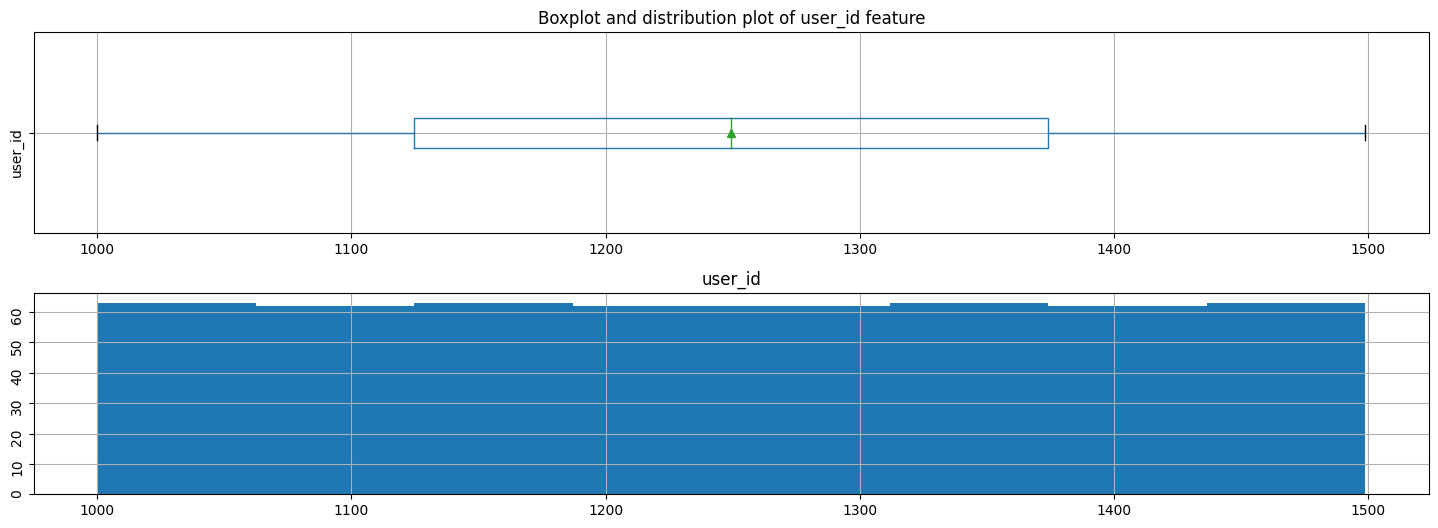

In [7]:
quant_dist(users, 'user_id')

Так и есть. Абсолютно равномерное распределение, как и должно быть.

#### Столбец `'age'` — возраст пользователя (годы)

Feature: age
count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64


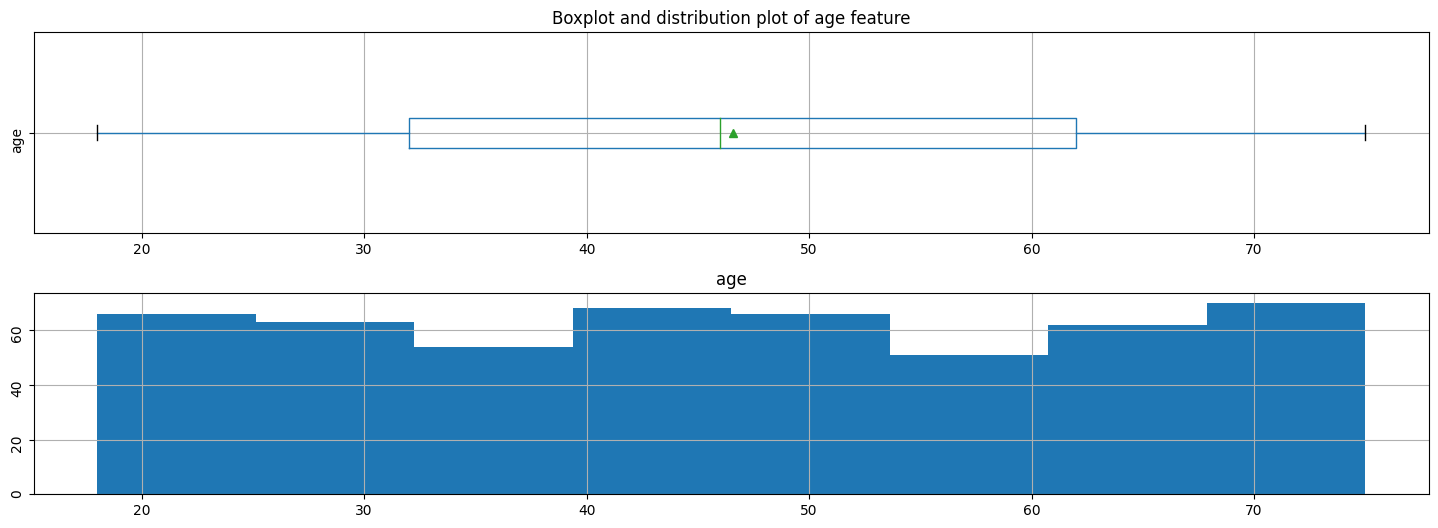

In [8]:
quant_dist(users, 'age')

По возрасту также наблюдается довольно равномерное распределение. Отдельные пики вызывают любопытство, но не более того.

#### Столбец `'first_name'` — имя пользователя

Этот столбец содержит строковые значения имен пользователей. Конечно, в нем будут дубликаты. Проверим, нет ли в списке некорректных значений:

In [9]:
users['first_name'].sort_values().unique()

array(['Авксентий', 'Агата', 'Агафья', 'Агнесса', 'Адам', 'Аким', 'Аксён',
       'Алан', 'Алевтина', 'Александр', 'Александра', 'Алексей', 'Алина',
       'Алиса', 'Алла', 'Альберта', 'Альбин', 'Альфред', 'Алёна',
       'Анатолий', 'Анвар', 'Ангелина', 'Андрей', 'Анжелика', 'Анита',
       'Антонина', 'Анфиса', 'Арина', 'Арнольд', 'Арсен', 'Арсений',
       'Артемий', 'Артём', 'Аурелия', 'Афанасий', 'Ахмет', 'Аюна',
       'Белла', 'Берта', 'Борис', 'Вадим', 'Валентина', 'Валерий',
       'Валерия', 'Варвара', 'Варлам', 'Василиса', 'Вениамин', 'Вера',
       'Вероника', 'Веселина', 'Виктор', 'Виктория', 'Виолетта',
       'Виталий', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Габриель', 'Габриэль', 'Гайдар', 'Галина', 'Гарри', 'Гектор',
       'Гелена', 'Геннадий', 'Геодар', 'Георгий', 'Георгина', 'Геральд',
       'Герасим', 'Глеб', 'Гордей', 'Григорий', 'Дайна', 'Дана', 'Даниил',
       'Даниэла', 'Дебора', 'Демьян', 'Денис', 'Джемма', 'Джозефина',
       'Джулия', '

Хотя некоротые имена вызывают желание привести их к единому написанию (Гаибриель и Габриэль, Рем и Рэм, Ренат и Ринат), не будем этого делать. В конце концов, кто мы такие, чтобы спорить с паспортным написанием? Тем более, что ни для одного исследовательского вопроса этот нюанс значения не имеет. Иных ошибок в столбце нет.

#### Столбец `'last_name'` — фамилия пользователя

Применим тот же подход, что и к предыдущему столбцу.

In [10]:
users['last_name'].sort_values().unique()

array(['Ёлчина', 'Ёркин', 'Ёркина', 'Ёрохов', 'Ёрохова', 'Абаимов',
       'Абакумов', 'Абакшина', 'Абалакова', 'Абалдуева', 'Абалкин',
       'Абашкин', 'Абашкина', 'Абдулина', 'Абоимов', 'Абрамович',
       'Абрамцев', 'Абрамычева', 'Абрашина', 'Абрикосова', 'Авдеев',
       'Авдеенко', 'Авдонюшкин', 'Авдушева', 'Авдышев', 'Авдюков',
       'Авраамова', 'Авраменко', 'Авринский', 'Аврорин', 'Авроров',
       'Авросимова', 'Авросинова', 'Авсейкина', 'Авчинникова', 'Агаев',
       'Агаева', 'Агапеева', 'Агеева', 'Адаменко', 'Адамов', 'Азаров',
       'Азерников', 'Азимова', 'Акимов', 'Акимчин', 'Акимычева',
       'Акиндинов', 'Акинин', 'Акинфьев', 'Аксёнов', 'Акуленко',
       'Александрова', 'Александрович', 'Александрюк', 'Алексеева',
       'Алексеенко', 'Алексеичев', 'Аленникова', 'Алесин', 'Алехина',
       'Алешин', 'Алешина', 'Алешкова', 'Алиев', 'Алфеева', 'Алфимов',
       'Алфимова', 'Алымова', 'Алютин', 'Алюшина', 'Алёшко', 'Алёшкова',
       'Амелин', 'Амелишко', 'Амельченк

Вывод будет тем же. Очевидных ошибок нет, а исправлять чужие фамилии - дело неблагодарное. Оставим всё как есть.

#### Столбец `'churn_date'` — дата прекращения пользования тарифом

В этом столбце значений мало, всего 38. Это означает, что лишь 38 пользователей из выборки прекратили пользование тарифом на момент формирования датасета.
Поскольку речь идет о дате, нам потребуется изменение формата данных на временной:

In [11]:
users.loc[:, 'churn_date'] = pd.to_datetime(
    users.loc[:, 'churn_date'], format='%Y-%m-%d')
users['churn_date'].dtype

/var/folders/z9/nxf9mlds6rlgnch0_jb60f800000gn/T/ipykernel_68570/4214554039.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  users.loc[:, 'churn_date'] = pd.to_datetime(


dtype('<M8[ns]')

Посмотрим на распределение имеющихся значений:

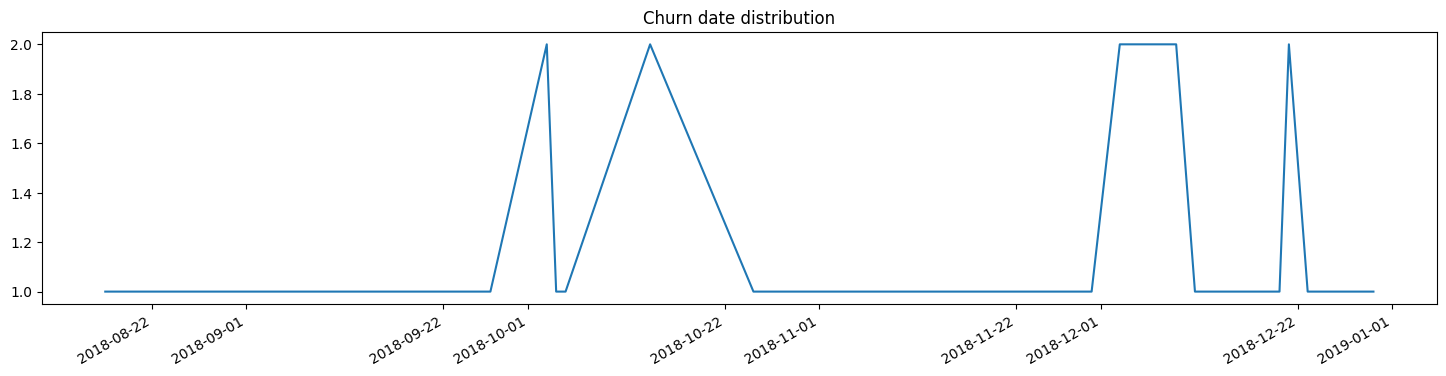

In [12]:
plt.figure(figsize=(18,4))
users['churn_date'].value_counts().plot(kind='line')
plt.title('Churn date distribution')
plt.show()

Любопытно, что все отказы от тарифа происходили во временном диапазоне с июля 2018 по декабрь 2019 г. Чуть позже сравним эти данные с данными столбца `'reg_date'` - даты подключения тарифа.

#### Столбец `'city'` — город проживания пользователя

По уже известной схеме оценим строковые значения этого столбца:

In [13]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Дубликатов нет. Со спокойной душой продолжим предварительный анализ и предобработку

#### Столбец `'reg_date'` — дата подключения тарифа (день, месяц, год)

Вновь столбец, от которого необходимо ожидать временного формата данных. Пропущенных значений в нем нет. Преобразуем тип данных:

In [14]:
users.loc[:, 'reg_date'] = pd.to_datetime(users.loc[:, 'reg_date'], format='%Y-%m-%d')
users['reg_date'].dtype

/var/folders/z9/nxf9mlds6rlgnch0_jb60f800000gn/T/ipykernel_68570/1930224157.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  users.loc[:, 'reg_date'] = pd.to_datetime(users.loc[:, 'reg_date'], format='%Y-%m-%d')


dtype('<M8[ns]')

Посмотрим на распределение дат регистрации:

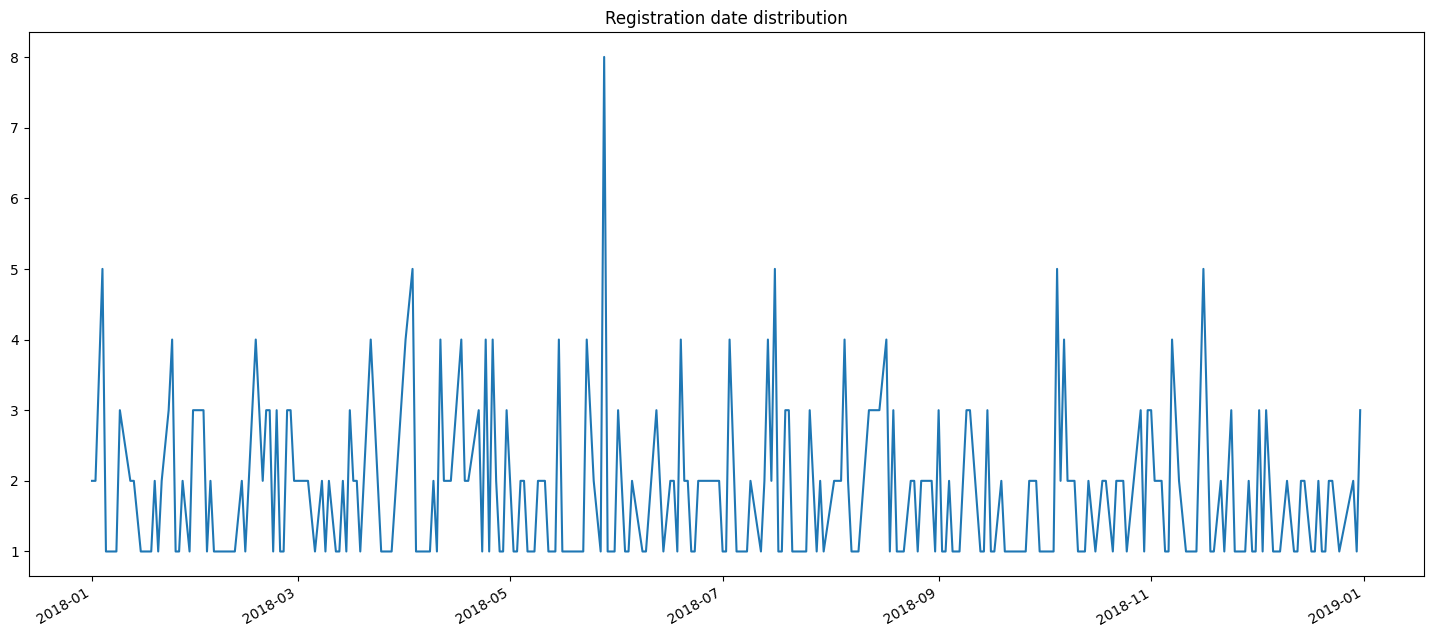

In [15]:
plt.figure(figsize=(18,8))
users['reg_date'].value_counts().plot(kind='line')
plt.title('Registration date distribution')
plt.show()

Даты регистрации охватывают промежуток в полный 2018-й календарый год.

Полюбопытствуем, каковы меры центральной тенденции и размаха для срока пользования тарифом (если есть сведения о прекращении его использования: 

In [16]:
(users[users['churn_date'].isna() != True]['churn_date'] - users[
    users['churn_date'].isna() != True]['reg_date']).describe()

count                             38
mean     124 days 01:53:41.052631578
std       79 days 22:41:20.878357110
min                  5 days 00:00:00
25%                 58 days 12:00:00
50%                105 days 12:00:00
75%                192 days 06:00:00
max                284 days 00:00:00
dtype: object

Сроки пользования тарифом до отказа от него довольно разнятся, однако средний и медианный срок составляет 3,5 - 4 месяца (а нижняя граница второго квартиля - почти 2 месяца), что выглядит вполне реалистично (насколько возможно всерьез обсуждать 38 наблюдений). Такого периода времени (от двух месяцев и более) вполне достаточно, чтобы оценить, подходит ли тариф, и при необходимости отказаться от него.

Кстати, полюбопытствуем, от каких тарифов пользователи отказались:

In [17]:
cancelled_tariffs = users[users['churn_date'].isna() != True]['tariff'].value_counts()
cancelled_tariffs

smart    23
ultra    15
Name: tariff, dtype: int64

На выборке в 38 участников такое распределение не должно вызывать подозрений. Если, конечно, нет большого разрыва между общим количеством пользователей этих тарифов. Вернемся к этому вопросу на следующем шаге, при обработке данных столбца `'tariffs'`.

#### Столбец 'tariff' — название тарифного плана

Проверим распределение названий тарифного плана в столбце (заодно проверив, нет ли ошибок):

In [18]:
overall_tariffs = users['tariff'].value_counts()
overall_tariffs

smart    351
ultra    149
Name: tariff, dtype: int64

Проверим, насколько отличаются друг от друга доли "отказников" по каждому тарифу:

In [19]:
cancelled_tariffs / overall_tariffs

smart    0.065527
ultra    0.100671
Name: tariff, dtype: float64

Безусловно, 6,5% и 10% - это отличающиеся друг от друга доли. Однако сам тип шкалы данных по тарифам (номинативная / категорийная) не позволяет использовать статистических методов проверки значимости различий в подвыборках. Поэтому примем к сведению полученное наблюдение и продолжим предобработку данных.

In [20]:
del cancelled_tariffs

### Таблица `'calls'` (информация о звонках)

#### Столбец `'id'` — уникальный номер звонка

С учетом первого взгляда на данные это должен быть столбец со строковыми значениями в диапазоне от `1000_0` до `1499_x`. Видимо, первая часть id (до нижнего подчеркивания) совпадает с уникальным идентификатором абонента. При этом в столбце могут быть представлены не все абоненты: некоторые абоненты могут не совершать звонков, а, например, пользоваться только услугами мобильного интернета.
Соответственно, алгоритм проверки правильности данных этого столбца может быть таков:
1. Взять строковое значение столбца `'id'`.
2. Извлечь из строки символы, совпадение которых с id абонента нужно проверить.
3. Перевести получившуюся строку в тип int.
4. Сравнить результат с соответствующим значением столбца `'user_id'` этого датасета.

Определим специальную функцию, реализующую этот алгоритм:

In [21]:
def check_ids(dataframe):
    '''
    The function check values in columns 'id' and 'user_id' of a dataset.
    It takes only one argument:
    1. dataframe: dataframe name

    The function extracts specific symbols from a row in the 'id' column
    and matches it to unique user ids from the 'user_id' column.
    If a non-match is found, the function returns a tuple with a message and a list
    containing row indexes, where non-matches were found. If all rows contain
    mathches, just a "Only matches are found!" message is shown.
    '''
    error_list = []
    for i in range(len(dataframe)):
        value = int(dataframe.loc[i, 'id'].split('_')[0])
        if value != dataframe.loc[i, 'user_id']:
            error_list.append(i)
    if error_list == []:
        return 'Only matches are found!'
    else:
        return 'Rows with non-matches:', error_list

In [22]:
check_ids(calls)

'Only matches are found!'

#### Столбец `'call_date'` — дата звонка

Изменим тип данных и проверим распределение звонков. Выдвинем гипотезу: распределение должно быть равномерным для "обычных" периодов с возможными пиками по праздникам.

In [23]:
calls.loc[:, 'call_date'] = pd.to_datetime(calls.loc[:, 'call_date'], format='%Y-%m-%d')

/var/folders/z9/nxf9mlds6rlgnch0_jb60f800000gn/T/ipykernel_68570/1423201002.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  calls.loc[:, 'call_date'] = pd.to_datetime(calls.loc[:, 'call_date'], format='%Y-%m-%d')


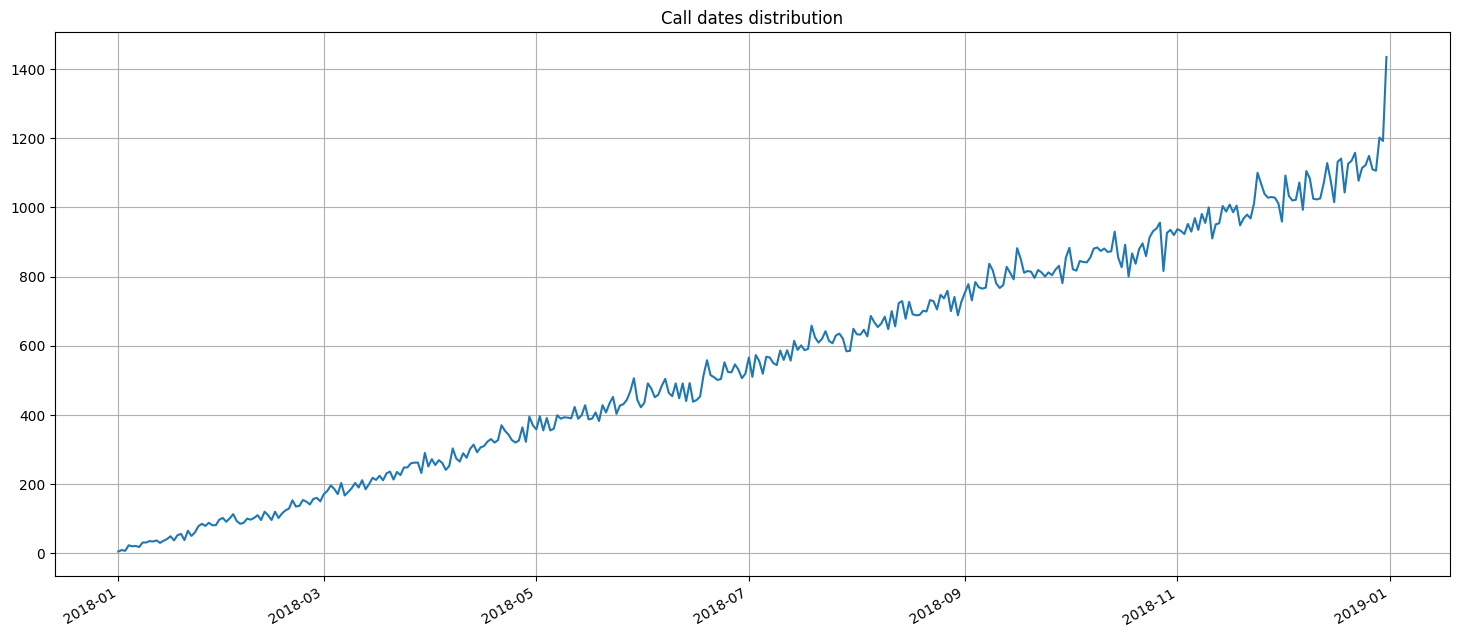

In [24]:
plt.figure(figsize=(18,8))
calls['call_date'].value_counts().plot(style='-', grid=True)
plt.title('Call dates distribution')
plt.show()

Выдвинутая гипотеза частично подтверждена. "Частично" - потому что гипотеза не учитывает какой-то параметр, например - рост абонентской базы для каждого тарифа. Пики на графике такого масштаба не очень заметны, что мешает связать их с календарными праздниками или выходными днями. "Подтверждена" - потому что воображаемая линия тренда здесь демонстрировала бы очевидно равномерное изменение этого неучтенного параметра (например, роста этой самой базы) и равномерное же распределение количества звонков с учетом изменения этого параметра. 

#### Столбец `'duration'` — длительность звонка в минутах

Feature: duration
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


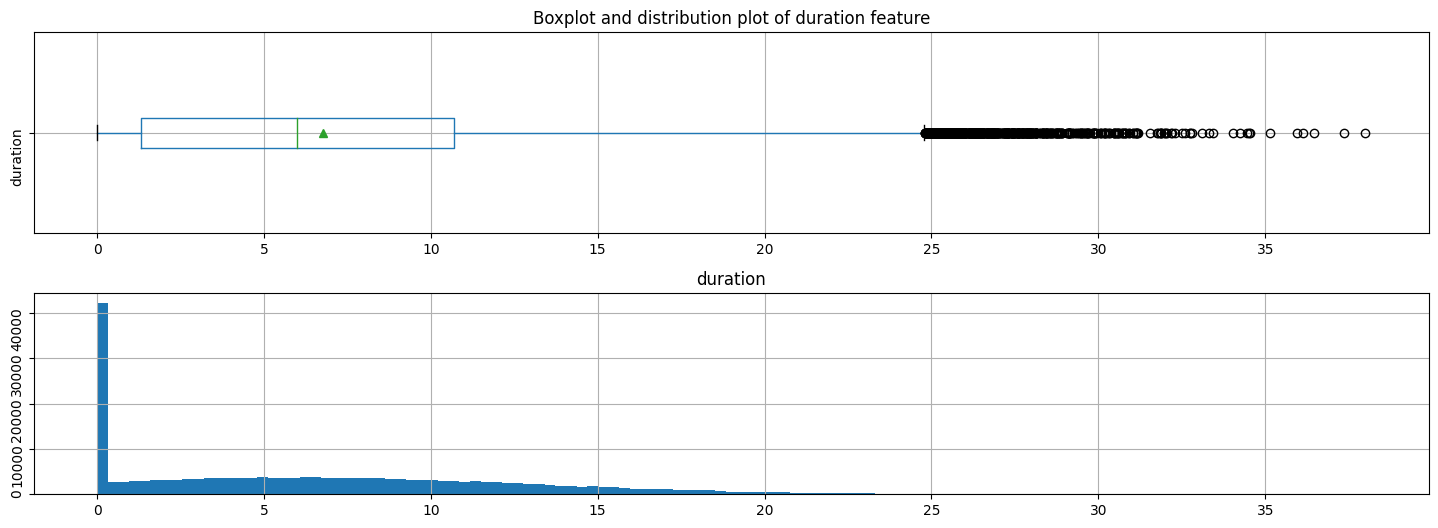

In [25]:
quant_dist(calls, 'duration')

In [26]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Хотя почти четверть звонков в датасете имела нулевую длительность, что само по себе любопытно. Остальное распределение имеет черты нормального. С учетом округления длительности звоков менее минуты до ровно 1 минуты - это довольно ожидаемая картина.

Среднее и медианное количество звонков в диапазоне от 6 до 6,8 минут тоже не являют никаких особых сюрпризов.

#### Столбец `'user_id'` — идентификатор пользователя, сделавшего звонок

На основе данных этого столбца можно делать выводы и об абонентах, наиболее и наименее активно совершающих звонки, и о количестве этих звонков.

In [27]:
calls['user_id'].value_counts().describe()

count     492.000000
mean      411.802846
std       291.803375
min        14.000000
25%       180.000000
50%       344.500000
75%       589.500000
max      1760.000000
Name: user_id, dtype: float64

Итак, абсолютно неактивных абонентов в выборке нет. В зависимости от метрики, медианное среднее количество звонков одного абонента изменяется от 344,5 до 412 (при довольно большом разбросе, о чем свидетельствует значение стандартного отклонения).

Отдельно проверим, как много звонков остается без ответа:

In [28]:
calls[calls['duration'] == 0]['user_id'].value_counts()

1377    336
1168    308
1453    295
1375    290
1196    262
       ... 
1206      6
1424      5
1084      5
1406      5
1442      5
Name: user_id, Length: 492, dtype: int64

Вряд ли необходимо удалять звонки с нулевой длительностью. Это не вина абонента, что адресат звонка не взял трубку. Если бы адресат взял трубку - разговор бы состоялся, а сотовый оператор тарифицировал бы звонок и получил прибыль. Для интересов аналитики важна частота и динамика любых звонков, потому что они отражают потребительское поведение абонента и дают основания для прогноза выручки и прибыли.

### Таблица `'messages'` (информация о сообщениях)

#### Столбец `'id'` — уникальный номер сообщения

Проверим столбец определенной ранее функцией: 

In [29]:
check_ids(messages)

'Only matches are found!'

#### Столбец `'message_date'` — дата сообщения

Раз данные содержат дату - изменим их тип на более уместный и проверим распределение количества сообщений за период наблюдений:

In [30]:
messages.loc[:, 'message_date'] = pd.to_datetime(messages.loc[:, 'message_date'], format='%Y-%m-%d')

/var/folders/z9/nxf9mlds6rlgnch0_jb60f800000gn/T/ipykernel_68570/1615922978.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  messages.loc[:, 'message_date'] = pd.to_datetime(messages.loc[:, 'message_date'], format='%Y-%m-%d')


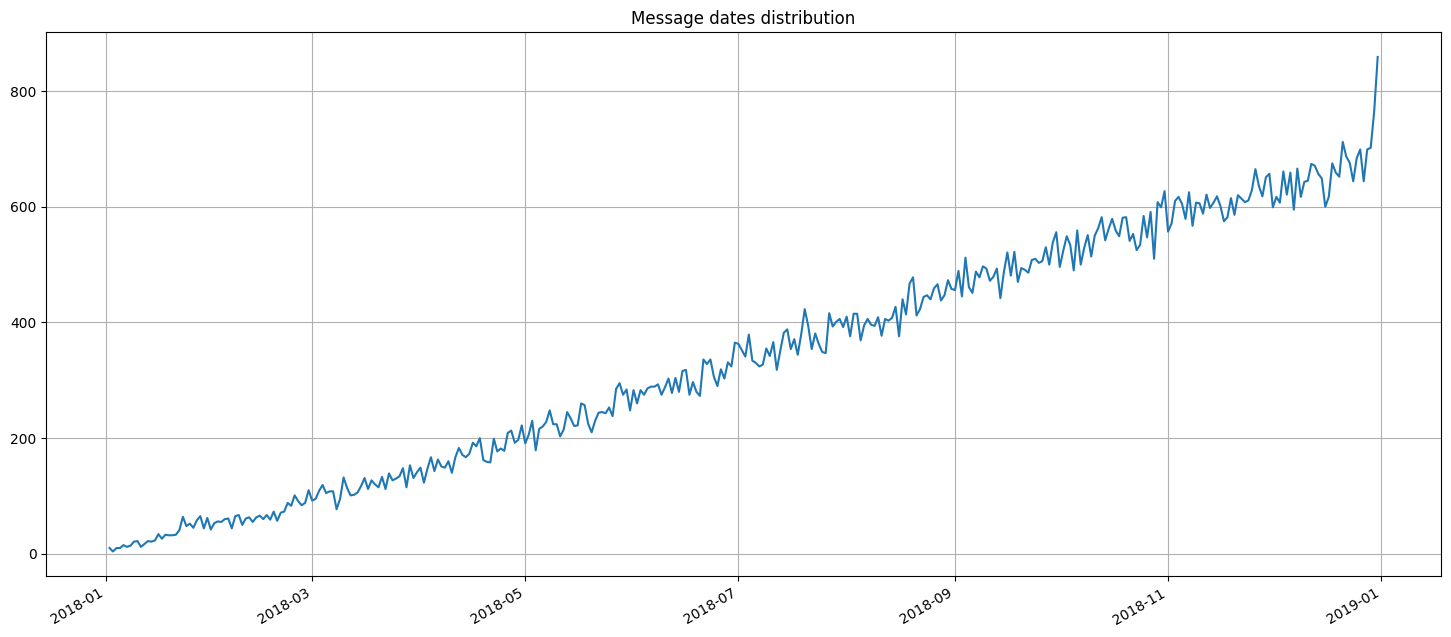

In [31]:
plt.figure(figsize=(18,8))
messages['message_date'].value_counts().plot(style='-', grid=True)
plt.title('Message dates distribution')
plt.show()

Довольно понятный график. Количество SMS за год так же росло равномерно (например, вслед за увеличением абонентской базы). Всплеск в конце года может быть связан с новогодними праздниками.

#### Столбец `'user_id'` — идентификатор пользователя, отправившего сообщение

По аналогии с предыдущим датасетом проверим активность пользователей по отправке сообщений:

In [32]:
messages['user_id'].value_counts().describe()

count     426.000000
mean      288.816901
std       267.607552
min         1.000000
25%        85.750000
50%       215.500000
75%       414.000000
max      1463.000000
Name: user_id, dtype: float64

75% пользователей отправили не меньше 85 сообщений за все время пользования тарифами. Причем нет ни одного пользователя, вообще не отправившего не одного сообщения (значение `min` не равно 0). Вероятно, некоторые соображения по поводу количества сообщений нам еще придется сделать, но пока остановимся на этом.

### Таблица `'internet'` (информация об интернет-сессиях)

Сначала разберемся с неизвестным столбцом `'Unnamed: 0'`, для которого отсутствует пояснение. Взглянем на данные:

In [33]:
internet['Unnamed: 0'].describe()

count    149396.000000
mean      74697.500000
std       43127.054745
min           0.000000
25%       37348.750000
50%       74697.500000
75%      112046.250000
max      149395.000000
Name: Unnamed: 0, dtype: float64

Этот столбец просто дублирует индекс, то есть является указателем порядковых номеров записей. Он возникает, когда данные сохраняют с указанием индекса: `pd.DataFrame().to_csv(..., index=column)` (это же значение действует по умолчанию). Если бы мы при чтении указали этот столбец - данные были бы прочитаны корректно: `pd.read_csv(..., index_col=0)`.

Столбец можно безболезненно удалить из датасета:

In [34]:
internet = internet.drop(columns='Unnamed: 0')

#### Столбец `'id'` — уникальный номер сессии

Проводим проверку соответствий столбцу `'user_id'`:

In [35]:
check_ids(internet)

'Only matches are found!'

#### Столбец `'mb_used'` — объём потраченного за сессию интернет-трафика (в мегабайтах)

Feature: mb_used
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


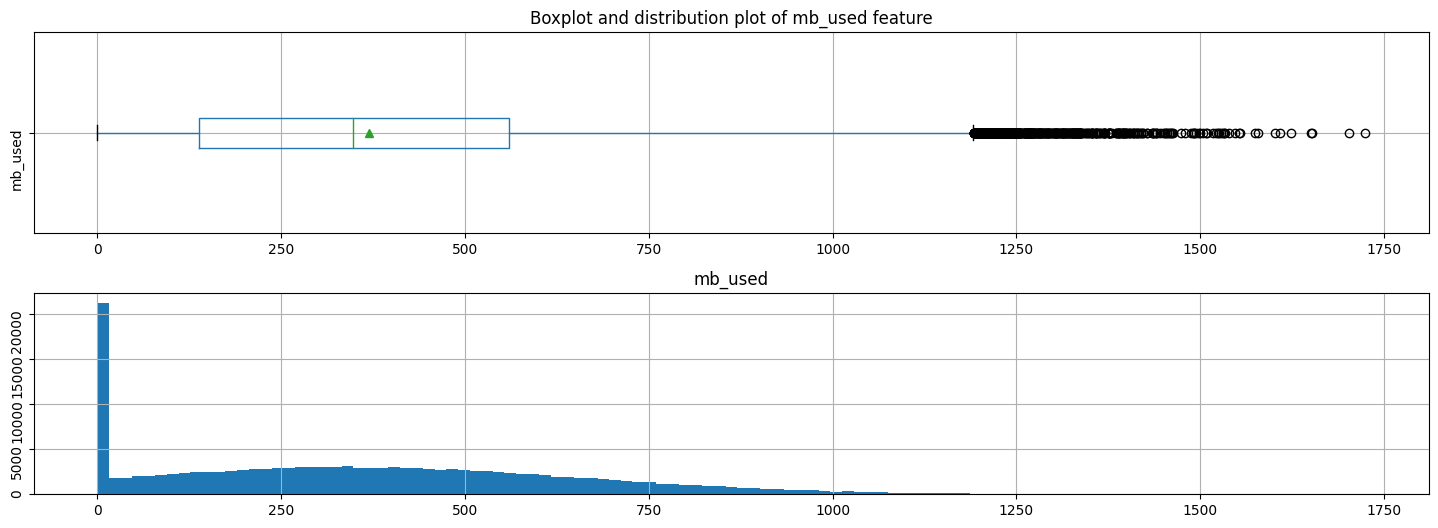

In [36]:
quant_dist(internet, 'mb_used')

In [37]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Ситуация очень похожа на длительнось звонков из датасета `'calls'`. Немалая часть абонентов за одну сессию использует от 0 до ~20 мб, что из-за округления дает такую "свечку" на графике.

#### Столбец `'session_date'` — дата интернет-сессии

Здесь требуется изменение типа данных. После - создадим график количества сессий в течение этого года. Вероятно, он также будет демонстрировать равномерное увеличение количества сессий вследствие воздействия третьего фактора (роста абонентской базы, как было предположено раньше):

In [38]:
internet.loc[:, 'session_date'] = pd.to_datetime(internet.loc[:, 'session_date'], format='%Y-%m-%d')

/var/folders/z9/nxf9mlds6rlgnch0_jb60f800000gn/T/ipykernel_68570/2738859407.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  internet.loc[:, 'session_date'] = pd.to_datetime(internet.loc[:, 'session_date'], format='%Y-%m-%d')


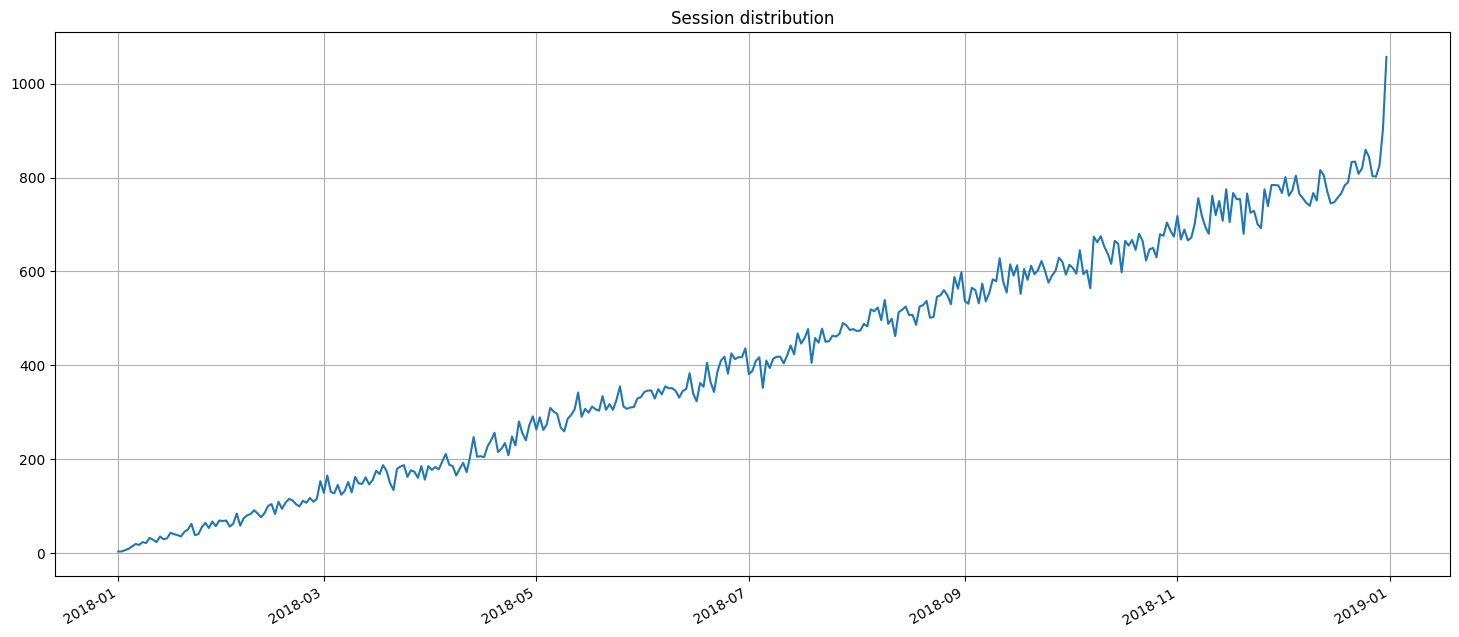

In [39]:
plt.figure(figsize=(18,8))
internet['session_date'].value_counts().plot(style='-', grid=True)
plt.title('Session distribution')
plt.show()

Эта гипотеза подтверждается. Количесто сессий (не объем трафика!) действительно равномерно росло за 2018 г. Количество трафика в конце года может быть связано с новогодним шквалом поздравлений и всем, что сопутствует новогодним праздникам.

#### Столбец `'user_id'` — идентификатор пользователя

По аналогии с двумя предыдущими датасетами проверим объемы использования абонентами мобильного интернета:

In [40]:
internet['user_id'].value_counts().describe()

count    497.000000
mean     300.595573
std      183.692830
min        8.000000
25%      155.000000
50%      284.000000
75%      424.000000
max      834.000000
Name: user_id, dtype: float64

Среднее количество сессий - 300 (медиана также близка к этому значению); правда, разброс данных довольно велик, на что указывает значение стандартного отклонения. Опять же, нет ни одного пользователя, вообще ни разу не воспользовавшегося мобильным интернетом (значение `min` равно 8).

### Таблица `'tariffs'` (информация о тарифах)

В этой таблице всего 2 записи:

In [41]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод по предобработке данных

Проверены все столбцы. Ошибок в данных не обнаружено. В некоторых датасетах и признаках тип данных изменен на "дата-время". Было обнаружено, что количество и звонков, и сообщений, и сессий передачи данных равномерно увеличивалось в течение всего периода наблюдения. С учетом того, что количество зарегистрированных пользователей распределено по периоду наблюдений также достаточно равномерно, можно предположить, что увеличение объемов пользования разными услугами сотовой связи было связано с простым ростом абонентской базы в течение периода наблюдения.

## Расчеты и добавление данных

Создадим ряд синтетических признаков:
1. Количество сделанных звонков и израсходованных минут разговора по месяцам.
2. Количество отправленных сообщений по месяцам.
3. Объем израсходованного интернет-трафика по месяцам.
4. Помесячную выручку с каждого пользователя.

Перечень абонентов содержится в датафрейме `'users'`. Однако вносить в него дополнительные сведения (тем более - разбивку каждого типа данных по месяцам) - означает "перегрузить" его сведениями, напрямую к нему не относящимися. Поэтому проведем отдельные расчеты в соответствии с заданием, а позже, при необходимости, сделаем новый датасет, который будет содержать результаты расчетов на основе данных других датасетов. Для этого сначала в каждом датасете создадим столбец `'month'`, который будет содержать порядковый номер месяца даты из столбца `'xxxx_date'` этого датасета: 

In [42]:
calls.loc[:, 'month'] = pd.DatetimeIndex(calls['call_date']).month
messages.loc[:, 'month'] = pd.DatetimeIndex(messages['message_date']).month
internet.loc[:, 'month'] = pd.DatetimeIndex(internet['session_date']).month

Для дальнейшей обработки нам необходимо округлить значения длительности звонков "вверх", до большего целого значения. Сделаем это в отдельном столбце:

In [43]:
calls.loc[:, 'duration_rounded'] = np.ceil(calls.loc[:, 'duration'])

Сформируем три промежуточных датасета, а затем объединим их в один. Иначе есть риск потери некоторых значений.

In [44]:
users_monthly_stats_calls = calls.pivot_table(index = [
    'user_id', 'month'], values = 'duration_rounded', aggfunc = (
        'count', 'sum')).reset_index()
users_monthly_stats_calls = users_monthly_stats_calls.rename(
    columns={'user_id': 'user_id', 'month': 'month',
             'count': 'calls', 'sum': 'minutes'})

users_monthly_stats_calls.head()

,user_id,month,calls,minutes
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [45]:
users_monthly_stats_messages = messages.pivot_table(index = [
    'user_id', 'month'], values = 'id', aggfunc = ('count')).reset_index()
users_monthly_stats_messages = users_monthly_stats_messages.rename(
    columns={'user_id': 'user_id', 'month': 'month', 'id': 'messages'})
users_monthly_stats_messages.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [46]:
users_monthly_stats_mb = internet.pivot_table(index = [
    'user_id', 'month'], values = 'mb_used', aggfunc = ('sum')).reset_index()
users_monthly_stats_mb = users_monthly_stats_mb.rename(
    columns={'user_id': 'user_id', 'month': 'month', 'mb_used': 'mb'})
users_monthly_stats_mb.head()

,user_id,month,mb
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Получены три датасета разной длины. Теперь необходимо объединить их и датасет `'users'` в один датафрейм, а затем удалить ненужные нам в дальнейших вычислениях столбцы:

In [47]:
users_monthly_stats = users_monthly_stats_calls.merge(
    users_monthly_stats_messages, on=['user_id', 'month'], how='outer'
)
users_monthly_stats = users_monthly_stats.merge(
    users_monthly_stats_mb, on=['user_id', 'month'], how='outer'
)
users_monthly_stats = users_monthly_stats.merge(
    users, on='user_id', how='left')
users_monthly_stats = users_monthly_stats.drop([
    'age', 'churn_date', 'first_name', 'last_name',
    'reg_date'], axis=1)

users_monthly_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   calls     3174 non-null   float64
 3   minutes   3174 non-null   float64
 4   messages  2717 non-null   float64
 5   mb        3203 non-null   float64
 6   city      3214 non-null   object 
 7   tariff    3214 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


In [48]:
del users_monthly_stats_calls, users_monthly_stats_messages, users_monthly_stats_mb

Тип данных object вполне объясним - во многих столбцах присутствуют пустые значения NaN. Однако они помешают нам далее при расчетах, поэтому необходимо заполнить все отсутствующие значения нулями:

In [49]:
users_monthly_stats = users_monthly_stats.fillna(0)

Вычислим помесячную выручку с каждого пользователя. Для этого создадим копию датасета, в которой будем проводить все вычисления, но без изменения структуры. Вычтем из нынешних значений "квоты" тарифов:

In [50]:
aux_stats = users_monthly_stats.copy()

aux_stats.loc[aux_stats['tariff'] == 'smart', 'minutes'] -= 500
aux_stats.loc[aux_stats['tariff'] == 'smart', 'messages'] -= 50
aux_stats.loc[aux_stats['tariff'] == 'smart', 'mb'] -= 15360
aux_stats.loc[aux_stats['tariff'] == 'ultra', 'minutes'] -= 3000
aux_stats.loc[aux_stats['tariff'] == 'ultra', 'messages'] -= 1000
aux_stats.loc[aux_stats['tariff'] == 'ultra', 'mb'] -= 30720

Если в результаты вычитания получается отрицательное значение - квота тарифа по этом показателю не превышена.
В дальнейших расчетах показатели, находящиеся в квот, можно просто не учитывать. Для этого присвоим им новое значение - ноль. Если значение равно нулю - с ним ничего больше делать не нужно:

In [51]:
for column in ['minutes', 'messages', 'mb']:
    aux_stats.loc[aux_stats[column] < 0, column] = 0

Обработаем значения трафика, превышающего квоту. Потому что в "Мегалайне" трафик сверх квоты учитывается довольно затейливо:

In [52]:
# converting Mb to Gb:
aux_stats.loc[:, 'mb'] /= 1024

# If traffic exceeds quota, the value will be non-zero
aux_stats.loc[:, 'mb'] = np.ceil(aux_stats.loc[:, 'mb'])

Теперь обработаем все значения, превышающие тарифные квоты. Переведем минуты, сообщения и гигабайты "сверх квоты" в рубли:

In [53]:
# Tariff "Smart":
aux_stats.loc[(aux_stats['tariff'] == 'smart') & (aux_stats['minutes'] != 0) , 'minutes'] *= 3
aux_stats.loc[(aux_stats['tariff'] == 'smart') & (aux_stats['messages'] != 0) , 'messages'] *= 3
aux_stats.loc[(aux_stats['tariff'] == 'smart') & (aux_stats['mb'] != 0) , 'mb'] *= 200

# Tariff "Ultra": 
aux_stats.loc[(aux_stats['tariff'] == 'ultra') & (aux_stats['mb'] != 0) , 'mb'] *= 150

Проведем финальные расчеты и занесем их в соответствующий столбец в датасете `user_monthly_stats`: 

In [54]:
aux_stats.loc[aux_stats['tariff'] == 'smart', 'month_revenue'] = 550 + aux_stats.loc[
    aux_stats['tariff'] == 'smart', 'minutes'] + aux_stats.loc[
    aux_stats['tariff'] == 'smart', 'messages'] + aux_stats.loc[
    aux_stats['tariff'] == 'smart', 'mb']

aux_stats.loc[aux_stats['tariff'] == 'ultra', 'month_revenue'] = 1950 + aux_stats.loc[
    aux_stats['tariff'] == 'ultra', 'minutes'] + aux_stats.loc[
    aux_stats['tariff'] == 'ultra', 'messages'] + aux_stats.loc[
    aux_stats['tariff'] == 'ultra', 'mb']

users_monthly_stats.loc[:, 'month_revenue'] = aux_stats.loc[:, 'month_revenue']
del aux_stats

In [55]:
users_monthly_stats.head(10)

,user_id,month,calls,minutes,messages,mb,city,tariff,month_revenue
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra,1950.0
5,1000,10,57.0,350.0,73.0,14702.49,Краснодар,ultra,1950.0
6,1000,11,43.0,338.0,58.0,14756.47,Краснодар,ultra,1950.0
7,1000,12,46.0,333.0,70.0,9817.61,Краснодар,ultra,1950.0
8,1001,11,59.0,430.0,0.0,18429.34,Москва,smart,1150.0
9,1001,12,63.0,414.0,0.0,14036.66,Москва,smart,550.0


Мы рассчитали помесячную выручку с каждого пользователя. Полюбопытствуем, как она распределена:

Feature: month_revenue
count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: month_revenue, dtype: float64


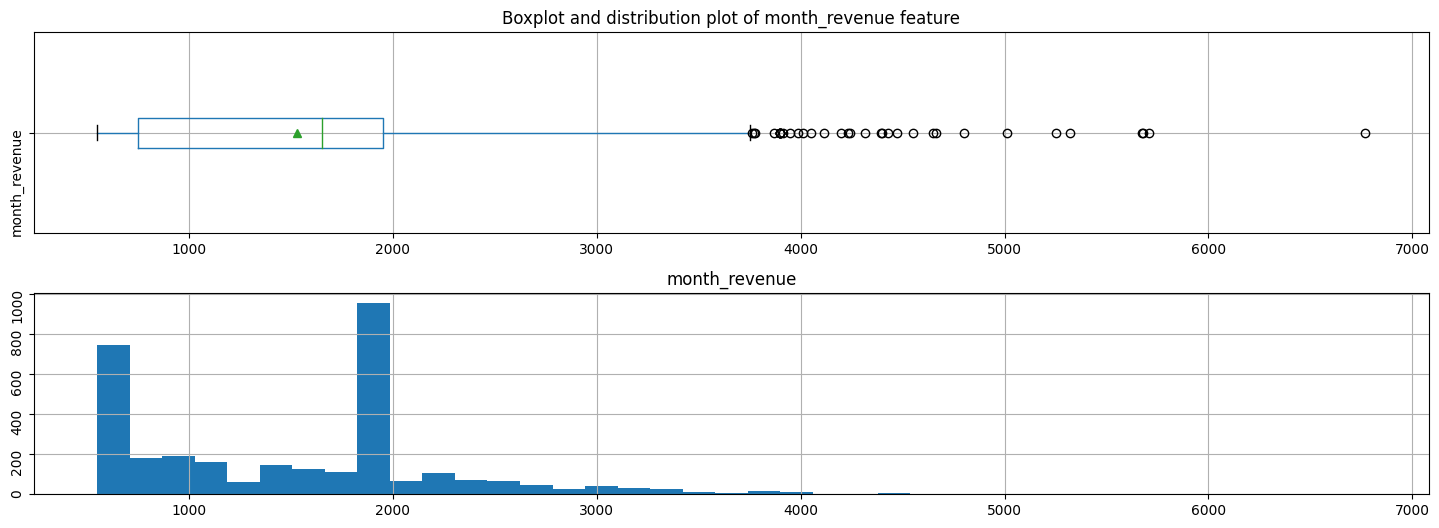

In [56]:
quant_dist(users_monthly_stats, 'month_revenue')

In [57]:
users_monthly_stats['month_revenue'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: month_revenue, dtype: float64

Ожидаемо, минимальное значение прибыли находится на уровне абонентской платы по самому "дешевому" тарифу. При этом среднее и медианное значения разнятся не очень сильно (что свидетельствует о примерной близости математического и геометрического распределений), однако значения стандартного отклонения и границ квартилей указывают на весьма большой разброс данных.

На следующем шаге необходимо проанализировать потребительское поведение абонентов в разрезе каждого тарифа.

## Исследовательский анализ данных

### Расчеты и графики

Сначала быстро взглянем на средние значения каждого параметра для каждого тарифа:

In [58]:
users_monthly_stats.groupby('tariff').mean()

/var/folders/z9/nxf9mlds6rlgnch0_jb60f800000gn/T/ipykernel_68570/1102696541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  users_monthly_stats.groupby('tariff').mean()


,user_id,month,calls,minutes,messages,mb,month_revenue
tariff,,,,,,,
smart,1246.506505,8.346792,58.463437,417.934948,33.384029,16208.386990,1289.973531
ultra,1263.094416,8.250761,73.392893,526.623350,49.363452,19468.805208,2070.152284


Конечно, далеко не все приведенные здесь значения требуют внимания. Средние арифметические индекса, а также столбца `'user_id'` не несут никакого содержательного смысла; единственное, что можно сказать по относительной близости пар этих значений: для обоих тарифов они распределены по нашему "расчетному" датасету `'users_monthly_stats'` сравнительно равномерно. Косвенный вывод, который мы можем сделать из близости значений средних арифметических столбца `'month'` - абонентские базы обоих тарифов также наполнялись примерно равномерно, в одном "темпе".

Другие значения более содержательны. Кажется, абоненты тарифа "Ультра" в среднем совершают больше звонков, "проговаривают" больше минут (возможно - благодаря тому, что звонят чаще), посыляют больше сообщений, используют больше трафика и затрачивают больше средств на обслуживание тарифа. Однако все эти средние значения требуют уточнения. Проведем сравнительный анализ поведения абонентов обоих тарифов по ключевым параметрам. Заодно проверим распределение данных по этим параметрам на соответствие нормальному распределению критерием Шапиро-Уилка. Критерий проверяет нулевую гипотезу о том, что данные в выборке распределены нормально. [Документация уточняет](https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro), что данную реализацию критерия можно применить на выборке нашего объема (n < 5000).

Сначала - посмотрим на соотношение значений в табличном виде:

In [59]:
users_monthly_stats.pivot_table(index = 'tariff', values = ['minutes', 'mb', 'messages'],
                        aggfunc = ['var', 'std', 'mean'])

var                                       std             \
                  mb     messages        minutes            mb   messages   
tariff                                                                      
smart   3.446250e+07   796.812958   36219.315784   5870.476681  28.227876   
ultra   1.017510e+08  2285.266143  100873.633397  10087.170752  47.804457   

                            mean                         
           minutes            mb   messages     minutes  
tariff                                                   
smart   190.313730  16208.386990  33.384029  417.934948  
ultra   317.606098  19468.805208  49.363452  526.623350

In [60]:
sample_ultra = users_monthly_stats.query('tariff == "ultra"')
sample_smart = users_monthly_stats.query('tariff == "smart"')

Теперь - визуализация распределения значений:

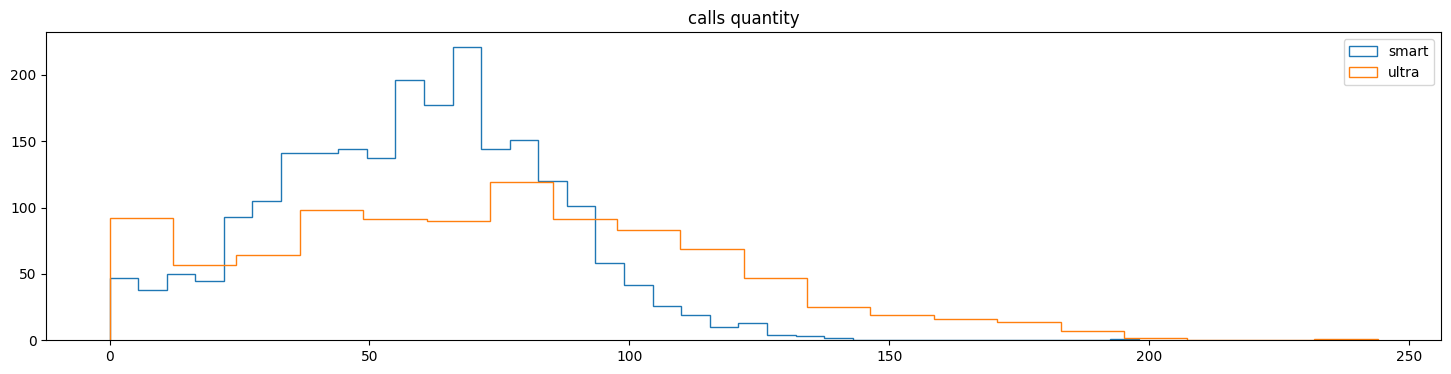

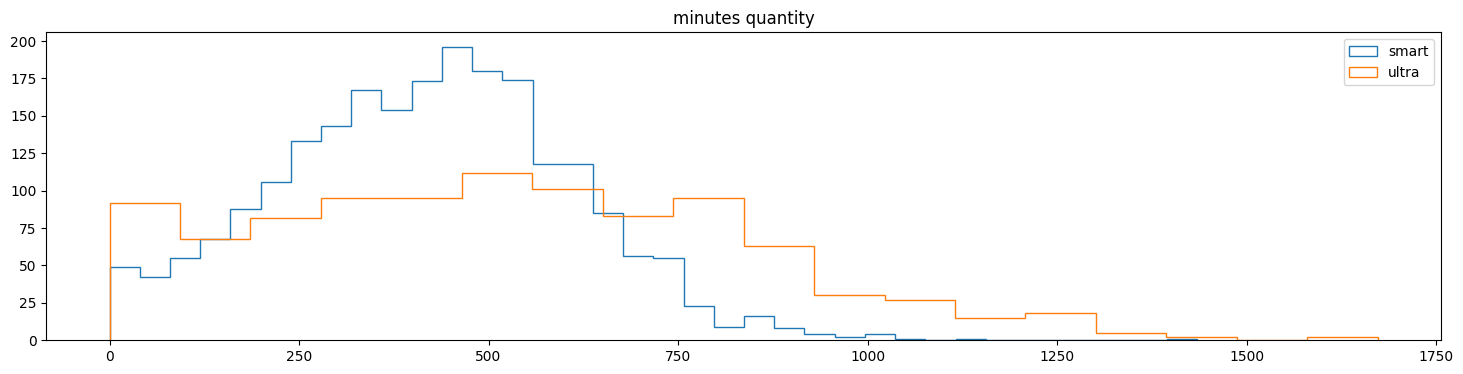

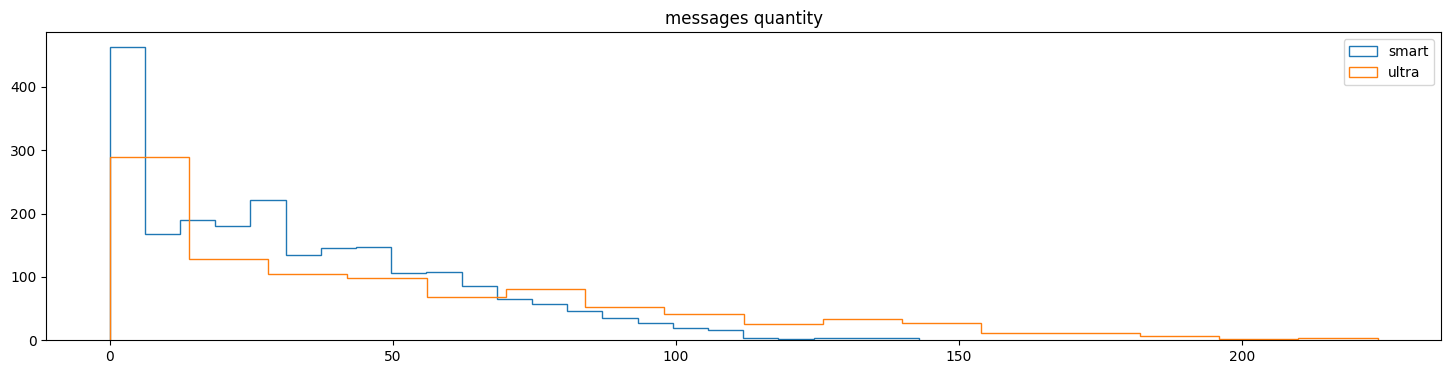

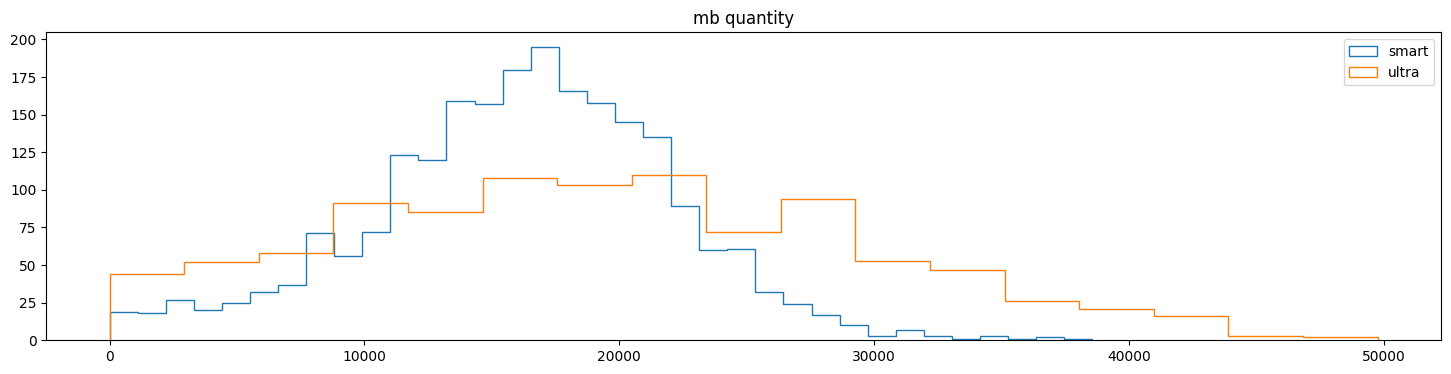

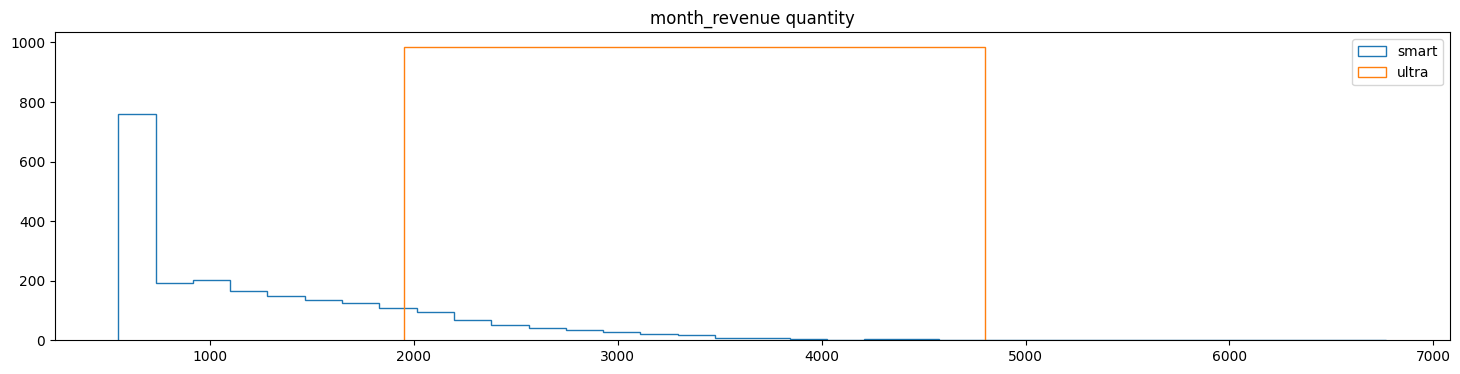

In [61]:
aux_columns = ['calls', 'minutes', 'messages', 'mb', 'month_revenue']
aux_tariffs = ['smart', 'ultra']
for column in aux_columns:
    plt.figure(figsize=(18,4))
    plt.hist(sample_smart[column], bins='fd', histtype='step', label='smart')
    plt.hist(sample_ultra[column], bins='fd', histtype='step', label='ultra')
    plt.legend(loc='upper right')
    plt.title(column + ' quantity')
    plt.show()
    print()

На каждом графике приведено распределение каждого значимого параметра для пользователей обоих тарифов.

Гистограмы распределения количества звонков (`'calls'`) демонстрируют для тарифа "Смарт" распределение, геометрически похожее на нормальное. Однако, забегая вперед, для всех параметров по всем тарифам есть основания отвергнуть нулевую гиотезу о нормальном распределении таких данных в генеральной совокупности на основе значений p-value критерия Шапиро-Уилка.
В целом видно, что при большем общем количестве звонков (в выборке больше абонентов именно этого тарифа), среднее количество звонков действительно несколько ниже при меньшем размахе и отсутствии выбросов.

Примерно та же картина для количества минут (`'minutes'`), используемых абонентами этого тарифа. Оба тарифа имеют небольшой выборос в районе нуля (задание подсказывает нам, что это могут быть пропущенные вызовы). Распределение для тарифа "Ультра" здесь также равномерное при несколько большем размахе.

Похожая закономерность наблюдается для сообщений (`'messages'`), хотя в этом столбце для обоих тарифов как нигде заметен выброс в районе нуля. Абоненты редко отправляют сообщения? Вполне правдоподобно, особенно во времена расцвета мобильного интернета. Опять же, тариф "Ультра" демонстрирует больший размах.

Гистограмма трафика (`'mb'`), кажется, отражает не только различия в использовании мобильного интернета, но и разное количесто абонентов каждого тарифа в выборке.

Главные различия кроются в ежемесячных тратах на мобильную связь (`'month_revenue'`). Очень хорошо заметно, что пользователи тарифа "Ультра" ежемесячно тратят на сотовую связь больше, чем пользователи конкурирующего тарифа. При этом показатели размаха отличаются не так уж и сильно, в отличие от рассмотренных ранее параметров. Однако не стоит торопиться с выводами ни о значимости различий, ни о их возможных причинах.

In [62]:
del calls, tariffs, internet, messages, users, aux_columns, aux_tariffs, column

### Предварительные выводы

При меньшем объеме подвыборки абоненты тарифа "Ультра" в среднем несколько чаще и дольше звонят, отправляют больше сообщений, используют больше мобильного трафика, но - при большем размахе. Иначе говоря, они являются более разнородной подвыборкой. Единственный показатель, по которому они демонстрируют сравнимую с пользователями другого тарифа однородность - среднемесячные расходы на связь, которые на тарифе "Ультра" также выше.

## Проверка гипотез

Проверим гипотезы о равенстве средних значений в каждом из двух наборов подвыборок:
- подвыборок абонентов а) тарифа "Смарт" и б) тарифа "Ультра";
- подвыборок абонентов из а) Москвы и б) других регионов.

Исследовательская гипотеза №1: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

H0: отсутствуют статистически значимые различия между средними значениями выручки абонентов двух тарифов.

H1: существуют статистически значимые различия между средними значениями выручки абонентов двух тарифов. Иная формулировка с тем же смыслом: различия между средними значениями выручки абонентов двух тарифов статистически значимы.

Теперь опишем подвыборки. Хотя в нашем дизайне исследования они взяты из выборки, принадлежащей одной генеральной совокупности (абоненты оператора мобильной связи "Мегалайн"), их можно рассматривать как независимые выборки из генеральных совокупностей "абоненты тарифа "Смарт" и "абоненты тарифа "Ультра". При этом нам известно, что дисперсии этих выборок (далее будем называть их именно так) различаются, что дает основания предполагать, что будут отличаться и дисперсии двух генеральных совокупностей.

Строго говоря, использование t-критерия Стьюдента для задачи сравнения средних требует их нормального распределения. Мы же выяснили, что распределение в выборках отличается от нормального (см. значения уровня значимости критерия Шапиро-Уилка для исследуемого параметра `'month_revenue'`). Одновременно замечания относительно применения альтернативных непараметрических критериев (Манна-Уитни, Краскелла-Уоллиса) "в один голос" говорят, что для выборок объемом больше 25-30 наблюдений значения тестовых статистик этих критериев все более апроксимируют нормальное распределение. Ну а поскольку мы считаем не вручную, - не вижу, почему благородным дон(н)ам не опробовать все три варианта (t-критерий Стьюдента, U-критерий манна-Уитни, H-критерий Краскелла-Уоллиса) и сравнить результаты. 

In [63]:
print('t-test p-value:', st.ttest_ind(
    sample_ultra['month_revenue'],
    sample_smart['month_revenue'],
    equal_var=False).pvalue)
print('Mann-Whitney p-value:', st.mannwhitneyu(
    sample_ultra['month_revenue'],
    sample_smart['month_revenue']).pvalue)
print('Kruskal-Wallis p-value:', st.kruskal(
    sample_ultra['month_revenue'],
    sample_smart['month_revenue']).pvalue)

t-test p-value: 4.2606313931076085e-250
Mann-Whitney p-value: 1.9803845594554806e-187
Kruskal-Wallis p-value: 1.979174415744257e-187


Даже нет необходимости выбирать пороговое значение уровня значимости. Вне зависимости от используемого критерия у нас есть основания отвергнуть нулевую гипотезу. То есть - принять альтернативную гипотезу для этих выборок о наличии статистически значимых различий между соответствующими генеральными совокупностями.

Перейдем к следующему исследовательскому вопросу.

Исследовательская гипотеза №2: "средняя выручка пользователей из Москвы и пользователей из других регионов различается".

H0: отсутствуют статистически значимые различия между средними значениями выручки абонентов из Москвы и других регионов.

H1: существуют статистически значимые различия между средними значениями выручки абонентов из Москвы и других регионов. Иначе: различия между средними значениями выручки абонентов из Москвы и других регионов статистически значимы.

In [64]:
sample_moscow = users_monthly_stats.query('city == "Москва"')
sample_outside = users_monthly_stats.query('city != "Москва"')

print('t-test p-value:', st.ttest_ind(
    sample_moscow['month_revenue'],
    sample_outside['month_revenue'],
    equal_var=False).pvalue)
print('Mann-Whitney p-value:', st.mannwhitneyu(
    sample_moscow['month_revenue'],
    sample_outside['month_revenue']).pvalue)
print('Kruskal-Wallis p-value:', st.kruskal(
    sample_moscow['month_revenue'],
    sample_outside['month_revenue']).pvalue)

t-test p-value: 0.5257376663729298
Mann-Whitney p-value: 0.37423394910366004
Kruskal-Wallis p-value: 0.37422074100016123


Если в качестве порогового уровня значимости alpha выбрать "конвенциональное" значение .05, то p-value всех критерие дают основания для отвержения нулевой гипотезы в пользу альтернативной о наличии статистически значимых различий между соответствующими генеральными совокупности.

Если в качестве порогового значения выбрать более строгое alpha = .005 (в академическом мире такая строгость обсуждается уже не первый год, см., например, [здесь](https://jamanetwork.com/journals/jama/article-abstract/2676503) или [здесь](https://www.nature.com/articles/s41562-017-0189-z)), значения p-value в t-тесте Стьюдента уже недостаточно для принятия решения об отвержении нулевой гипотезы. Однако помня, что данные генеральных совокупностей, судя по всему, принадлежат какому-то иному распределению, чем нормальное, мы имеем основания больше полагаться на значения двух других, непараметрических критериев. А они достаточно твердо свидетельствуют в пользу отвержения нулевой гипотезы и принятия альтернативной.  

In [65]:
del sample_ultra, sample_smart, sample_moscow, sample_outside

## Финальные расчеты

Для формулирования итогового вывода проекта вновь вспомним, как был сформулирован запрос на исследование: "*Нужно проанализировать поведение клиентов и сделать вывод —* ***какой тариф лучше***."

Ответ на подобный вопрос аналитик дать не может. "Лучше/хуже" - это категории, которыми может оперировать собственник бизнеса. Именно поэтому цель исследования была определена так: "*...определить среди тарифов "Смарт" и "Ультра" компании "Мегалайн" приносящий наибольшую выручку.*"

Подсчитаем на основе данных выборки общую выручку каждого тарифа и среднюю выручку с пользователя для каждого тарифа. Если выборка была сформирована случайным образом, эти данные можно довольно точно экстраполировать на всю генеральную совокупность:

In [66]:
total_revenue_ultra = users_monthly_stats.query('tariff == "ultra"')['month_revenue'].sum()
total_revenue_smart = users_monthly_stats.query('tariff == "smart"')['month_revenue'].sum()
average_revenue_ultra = total_revenue_ultra / overall_tariffs.loc['ultra']
average_revenue_smart = total_revenue_smart / overall_tariffs.loc['smart']
print('Общая выручка тарифа "Ультра":', total_revenue_ultra)
print('Общая выручка тарифа "Смарт":', total_revenue_smart)
print('Средняя выручка тарифа "Ультра" в расчете на пользователя:', average_revenue_ultra)
print('Средняя выручка тарифа "Смарт" в расчете на пользователя:', average_revenue_smart)

Общая выручка тарифа "Ультра": 2039100.0
Общая выручка тарифа "Смарт": 2875351.0
Средняя выручка тарифа "Ультра" в расчете на пользователя: 13685.23489932886
Средняя выручка тарифа "Смарт" в расчете на пользователя: 8191.883190883191


In [67]:
del users_monthly_stats, total_revenue_ultra, total_revenue_smart
del average_revenue_ultra, average_revenue_smart, overall_tariffs

## Итоговый вывод

Финальные расчеты свидетельствуют: абоненты тарифа "Ультра" в среднем:
- ежемесячно совершают больше звонков;
- тратят на разговор больше минут в месяц;
- отправляют ежемесячно больше сообщений;
- тратят больше мегабайт мобильного трафика.

В пересчете на одного пользователя абоненты этого тарифа генерируют **больше выручки**. Значит ли это, что они более выгодны, как и тариф "Ультра"? Статистически - да.

Но! "Статистически" не равнозначно "экономически". Единственный параметр, по которому нижняя граница размаха для обоих тарифов **НЕ** совпадает - это ежемесячная выручка с абонента. И это легко объяснимо: у тарифов почти в четыре раза отличается абонентская плата. Однако во всех остальных параметрах показатели абонентов обоих тарифов имеют одинаковую нижнюю границу при большем размахе для тарифа "Ультра". Это значит: пользовательское поведение по крайней мере заметной части абонентов тарифа "Ультра" мало чем отличается от "типичного" поведения абонентов тарифа "Смарт". Столь высокие показатели по всем параметрам, включая общую выручку от тарифа и среднуюю выручку на абонента, для тарифа "Ультра" достигаются благодаря сравнительно небольшой доле "суперпользователей". Эти пользователи, скорее всего, совершенно рационально выбрали более дорогой (на первый взгляд) тариф. Другой тариф с учетом объемов потребляемых ими услуг вышел бы им еще дороже. Другим же абонентам этого тарифа (**НЕ** "суперпользователям") другой тариф в некоторых случаях мог быть даже выгоднее с точки зрения ежемесячных расходов. Но, - они пользуются "Ультрой" (по крайней мере, пользовались в 2018 году, если не отказались от него), и это статистический факт.

То есть привлекать новых пользователей на тариф "Ультра" для "Мегалайна" финансово может быть весьма выгодно. Однако вряд ли это значит, что "Мегалайну" следует отказаться от "Смарта". Не все пользователи готовы платить за "Ультру", и если "Мегалайн" не предложит им альтернатив - они просто уйдут к другому оператору. "Смарт" же пока является такой альтернативой. И если доходы от него перевешивают издержки на его содержание - он или его аналог также нужен.

## Заключение 

**Цель проекта** проекта была сформулирована так: определить среди тарифов "Смарт" и "Ультра" компании "Мегалайн" приносящий наибольшую выручку.

Были проделаны следующие работы:
1. Проведен предварительный анализ данных.
2. Проведена предобработка данных:
    - обнаружены осутствующие значения;
    - предположены возможные причины пропуска данных;
    - заполнены пропуски там, где это необходимо;
    - вычислен ряд параметров, описывающих поведение абонентов мобильной связи.
3. Проведен анализ данных, в том числе графическими методами.
4. Проверены статистические гипотезы, связанные с целью проекта:
    - проверена гипотеза о наличии разницы в средней выручке от тарифов "Смарт" и "Ультра";
    - проверена гипотеза о наличии разницы в средней выручке от абонентов из Москвы с одной стороны, и абонентов из других регионов - с другой.
5. Сформулированы выводы относительно исследовательских вопросов.

Определено, что статистически большую выручку для мегалайна приносит тариф "Ультра". Однако портреты пользователей двух тарифов достаточно разнятся, чтобы рекомендовать заказчику не отказываться от тарифа "Смарт" в пользу тарифа "Ультра"